In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from tqdm import tqdm
from geopy.geocoders import Nominatim
from time import sleep
from geopy.geocoders import OpenCage
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes
import contextily as ctx
from opencage.geocoder import OpenCageGeocode
import folium

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline

In [64]:
collisions_2018_file_path = r'/Users/aarohigoel/Documents/JuneSCIntern/sc_loc2018.csv'
collisions_2019_file_path = r'/Users/aarohigoel/Documents/JuneSCIntern/USC College of Education/sc_loc2019.csv'
collisions_2020_file_path = r'/Users/aarohigoel/Documents/JuneSCIntern/USC College of Education/sc_loc2020.csv'
collisions_2021_file_path = r'/Users/aarohigoel/Documents/JuneSCIntern/USC College of Education/sc_loc2021.csv'
collisions_2022_file_path = r'/Users/aarohigoel/Documents/JuneSCIntern/USC College of Education/prelim_sc_loc2022.csv'

urban_rural_file_path = r'/Users/aarohigoel/Documents/JuneSCIntern/County_Rural_Lookup.xlsx'
alive_25_students_path = r'/Users/aarohigoel/Documents/JuneSCIntern/A25 Data + County + Urb_Rur.csv'

collisions_2018_df = pd.read_csv(collisions_2018_file_path)
collisions_2019_df = pd.read_csv(collisions_2019_file_path)
collisions_2020_df = pd.read_csv(collisions_2020_file_path)
collisions_2021_df = pd.read_csv(collisions_2021_file_path)
collisions_2022_df = pd.read_csv(collisions_2022_file_path)
urban_rural_df = pd.read_excel(urban_rural_file_path)
alive_25_students_df = pd.read_csv(alive_25_students_path)

/var/folders/v4/yxvm7jqs5q972gt4cxs6_xym0000gn/T/ipykernel_10888/1245818944.py:12: DtypeWarning: Columns (5,15,29,41,51) have mixed types. Specify dtype option on import or set low_memory=False.
  collisions_2020_df = pd.read_csv(collisions_2020_file_path)
/var/folders/v4/yxvm7jqs5q972gt4cxs6_xym0000gn/T/ipykernel_10888/1245818944.py:13: DtypeWarning: Columns (5,15,29,41,51) have mixed types. Specify dtype option on import or set low_memory=False.
  collisions_2021_df = pd.read_csv(collisions_2021_file_path)
/var/folders/v4/yxvm7jqs5q972gt4cxs6_xym0000gn/T/ipykernel_10888/1245818944.py:14: DtypeWarning: Columns (5,15,41,51) have mixed types. Specify dtype option on import or set low_memory=False.
  collisions_2022_df = pd.read_csv(collisions_2022_file_path)


In [65]:
def get_pivot(collision_df, county_df, year):
    merged_df = pd.merge(collision_df,  
                         county_df,  
                         on ='cty',  
                         how ='left') 

    pivot_table = pd.pivot_table(merged_df, values='ano', index=None,
                       columns="Rural/Urban Status", aggfunc="count").reset_index()
    pivot_table.iloc[0,0] = year
    return pivot_table

In [66]:
pivot_2018 = get_pivot(collisions_2018_df, county_status_df, '2018')
pivot_2018

Rural/Urban Status,index,Completely Rural,Mostly rural,Urban
0,2018,706,24254,117446


In [67]:
pivot_2019 = get_pivot(collisions_2019_df, county_status_df, '2019')
pivot_2019

Rural/Urban Status,index,Completely Rural,Mostly rural,Urban
0,2019,657,23480,116959


In [68]:
pivot_2020 = get_pivot(collisions_2020_df, county_status_df, '2020')
pivot_2020

Rural/Urban Status,index,Completely Rural,Mostly rural,Urban
0,2020,514,22233,98488


In [69]:
pivot_2021 = get_pivot(collisions_2021_df, county_status_df, '2021')
pivot_2021

Rural/Urban Status,index,Completely Rural,Mostly rural,Urban
0,2021,787,26945,119992


In [70]:
pivot_2022 = get_pivot(collisions_2022_df, county_status_df, '2022')
pivot_2022

Rural/Urban Status,index,Completely Rural,Mostly rural,Urban
0,2022,701,24943,117232


In [71]:
total_years = [pivot_2018, pivot_2019, pivot_2020, pivot_2021, pivot_2022]
table_total_years = pd.concat(total_years)
table_total_years

Rural/Urban Status,index,Completely Rural,Mostly rural,Urban
0,2018,706,24254,117446
0,2019,657,23480,116959
0,2020,514,22233,98488
0,2021,787,26945,119992
0,2022,701,24943,117232


In [72]:
urbanColumn = table_total_years['Urban']
urbanColumn

0    117446
0    116959
0     98488
0    119992
0    117232
Name: Urban, dtype: int64

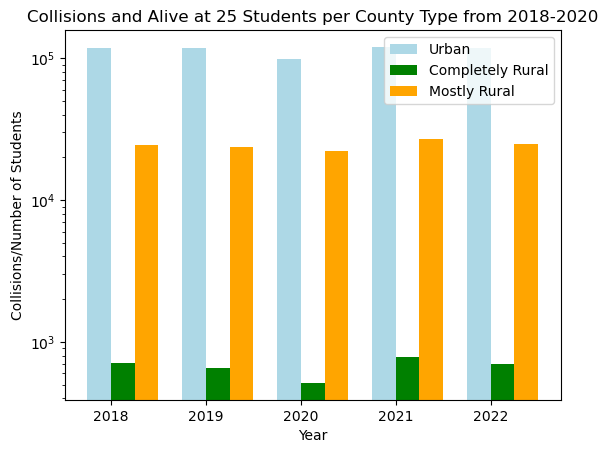

In [89]:
r = np.arange(table_total_years.shape[0]) 
width = 0.25

plt.bar(r, table_total_years['Urban'], color = 'lightblue', 
        width = width, 
        label='Urban') 
plt.bar(r + width, table_total_years['Completely Rural'], color = 'green', 
        width = width, 
        label='Completely Rural') 
plt.bar(r+width*2, table_total_years['Mostly rural'], color = 'orange', 
        width = width,
        label='Mostly Rural') 
  
plt.xlabel("Year") 
plt.ylabel("Collisions/Number of Students") 
plt.title("Collisions and Alive at 25 Students per County Type from 2018-2020") 

plt.yscale("log")   
  
# plt.grid(linestyle='--') 
plt.xticks(r + width/2,['2018','2019','2020','2021','2022']) 
plt.legend() 
  
plt.show() 